In [1]:
# read data, compulsory
import json

import torch

# variables
ckpt_path = '../../../ai4ps_logs/checkpoints/soqy_checkpoint.pt'

data = torch.load(ckpt_path)
print(type(data))
print(data.keys())

predictions = list(data['targets']['predictions'].reshape(-1).numpy())
targets = data['targets']['targets']

<class 'dict'>
dict_keys(['state_dict', 'loss', 'val_loss_list', 'targets'])


0.18751734495162964


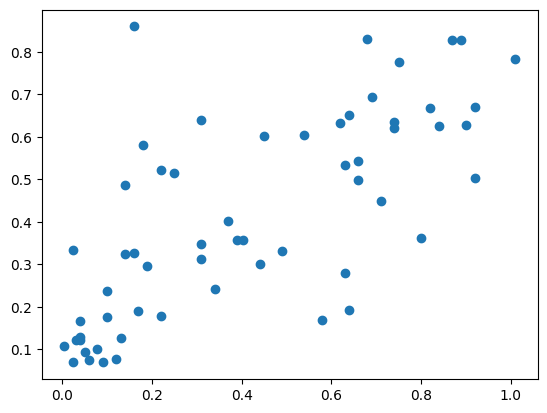

In [2]:
from matplotlib import pyplot as plt
import numpy as np

np_pred = np.array(predictions)
np_targ = np.array(targets)
r2 = 1 - np.mean((np_pred - np_targ)**2)/np.var(np_pred)
print(r2)
plt.scatter(targets, predictions)
plt.show()

In [5]:
np_targ

array([0.87  , 0.37  , 0.49  , 0.22  , 0.54  , 0.69  , 0.62  , 0.58  ,
       0.75  , 0.16  , 0.06  , 0.63  , 0.1   , 0.92  , 0.39  , 0.64  ,
       0.023 , 1.01  , 0.0046, 0.8   , 0.04  , 0.71  , 0.31  , 0.13  ,
       0.12  , 0.66  , 0.05  , 0.16  , 0.31  , 0.63  , 0.64  , 0.74  ,
       0.92  , 0.04  , 0.66  , 0.03  , 0.023 , 0.45  , 0.18  , 0.14  ,
       0.44  , 0.09  , 0.74  , 0.25  , 0.078 , 0.34  , 0.1   , 0.82  ,
       0.9   , 0.19  , 0.89  , 0.31  , 0.04  , 0.14  , 0.17  , 0.84  ,
       0.403 , 0.22  , 0.68  ], dtype=float32)